# 비지도 학습
- 타깃을 모르는 데이터를 대상으로 함, 알아서 학습

# 1.군집화

## 데이터셋: bit.ly/fruits_300_data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fruits=np.load('./fruits_300.npy')   #배열로 불러오기

In [7]:
fruits.shape  #100X100그림이 300개

(300, 100, 100)

In [11]:
fruits.min(), fruits.max()

(1, 255)

### np배열을 plt의 그림으로 나타내기

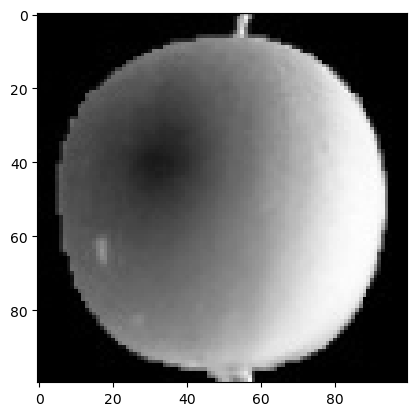

In [14]:
plt.imshow(fruits[0],cmap='gray')  #첫번째 사진

### 이때 그림은 색반전되어있음->검을수록(색이 있을수록) 0에가까워지고 흰색일수록 숫자가 커짐
### 원래라면 배경이 흰색이었던것을 반전시켜 과일을 흰색으로 전환해 컴퓨터가 255흰색에 집중할 수 있도록 할것임

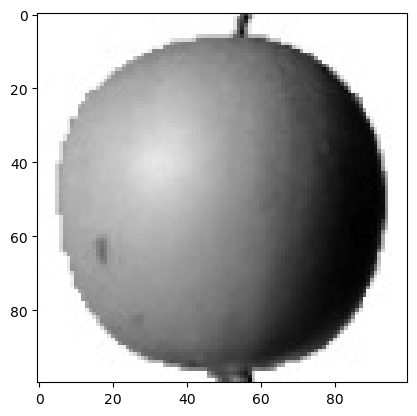

In [16]:
plt.imshow(fruits[0],cmap='gray_r') #gray_r로 배경 흰색으로

### 여기서는 흰부분이 0에 가깝고 검은 부분이 255에 가까움

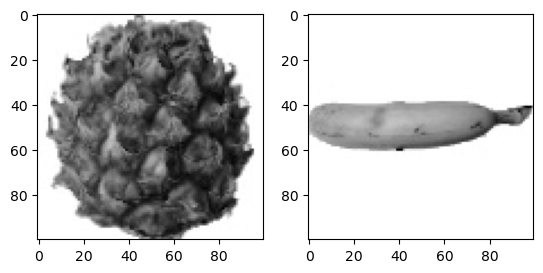

In [26]:
fig, axes=plt.subplots(1,2)    #1행 2열
axes[0].imshow(fruits[100],cmap='gray_r')
axes[1].imshow(fruits[200],cmap='gray_r')

## 픽셀값 분석-> apple,pineapple,banana는 어떻게 구분할까?
- fruits의 0\~99레이어는 사과, 100\~199레이어는 파인애플, 200~299레이어는 바나나 사진임
- 각 과일종류당 100개의 샘플에서 100개 레이어는 그대로 놔두고 각 레이어에 대한 100행X100열을 1차원배열로

In [27]:
apple=fruits[0:100].reshape(-1,100*100)    #-1로하면 자동으로 남은 차원을 할당
pineapple=fruits[100:200].reshape(-1,100*100)
banana=fruits[200:300].reshape(-1,100*100)

In [29]:
apple.shape  #100개의 그림과 각 그림은 10000개의 숫자로 이루어져있음

(100, 10000)

### 각 그림의 평균값

In [32]:
apple.mean(axis=1)   #axis1로 해야 각 행(그림)안에서의 평균을 구해줌

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

### 각 그림 히스토그램으로 보기

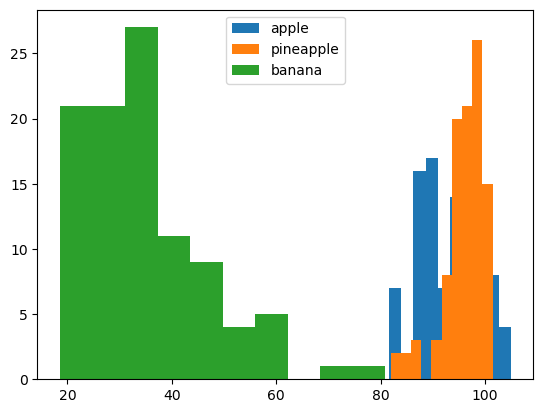

In [35]:
plt.hist(apple.mean(axis=1))
plt.hist(pineapple.mean(axis=1))
plt.hist(banana.mean(axis=1))
plt.legend(['apple','pineapple','banana'])
plt.show()

### 이렇게하면 바나나는 구분가능하지만 apple과 pineapple은 비교가 쉽지않음

### 각 종류별 과일 100개의 하나의 픽셀값 평균은 np.mean(axis=0)

<BarContainer object of 10000 artists>

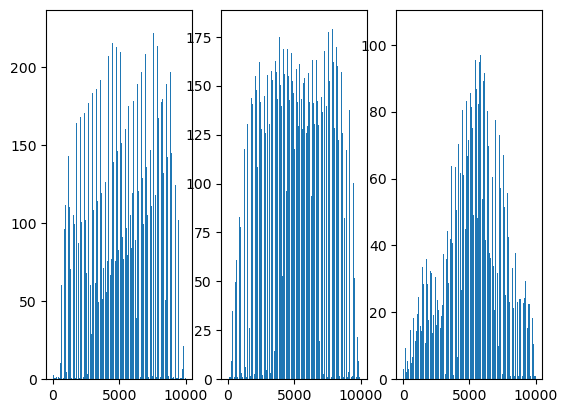

In [36]:
fig, axes= plt.subplots(1,3)
axes[0].bar(range(10000),apple.mean(axis=0))
axes[1].bar(range(10000),pineapple.mean(axis=0))
axes[2].bar(range(10000),banana.mean(axis=0))

### 각 픽셀 평균을 그림으로 나타내기(100개를 하나의 과일그림으로)

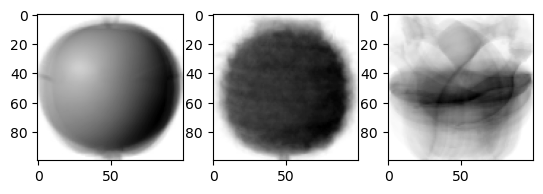

In [39]:
apple_mean=apple.mean(axis=0).reshape(100,100)  #100행100열로 만들어 이미지화 가능하게끔
pineapple_mean=pineapple.mean(axis=0).reshape(100,100)  
banana_mean=banana.mean(axis=0).reshape(100,100)  

fig, axes=plt.subplots(1,3)
axes[0].imshow(apple_mean,cmap='gray_r')
axes[1].imshow(pineapple_mean,cmap='gray_r')
axes[2].imshow(banana_mean,cmap='gray_r')

## 평균값과 가까운 사진 고르기
- 사과 사진의 평균값인 apple_mean과 가장 가까운 사진 고르기

In [56]:
abs_diff=np.abs(fruits-apple_mean)  # (300,100,100) -(100,100)가능: 각 레이어마다 뺌->이것을 각 요소별로 절대값화
abs_mean=np.mean(abs_diff,axis=(1,2))  #2,3차원전부 지정하여 평균내기->결국 남는거는 1차원(레이어)->300개 과일의 차이값을 하나로 표현하게됨
abs_mean.shape, abs_mean[:10]

((300,),
 array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
        16.795812, 16.144276, 19.611994, 21.32059 ]))

## 이 오차들 중 작은 값들 100개 가져오기

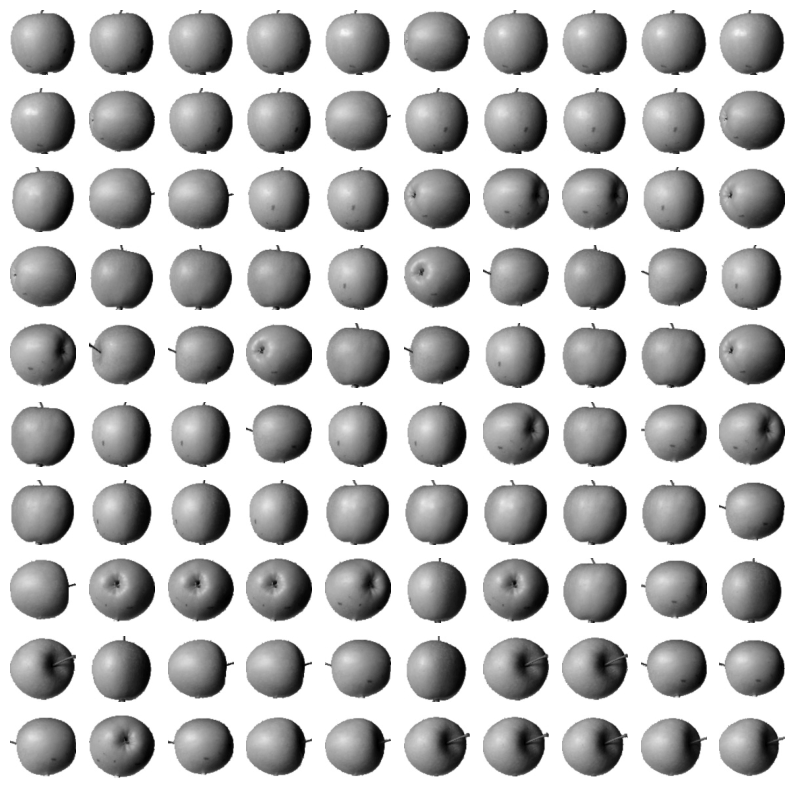

In [57]:
apple_index=np.argsort(abs_mean)[:100]  #sort는 작은수부터가져옴->argsort는 작은값들의 인덱스값
fig, axes=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
        axes[i,j].axis('off')
plt.show()

## 사과만 모임-> 비슷한 샘플끼리 모으는 작업을 군집이라고 함/ 만들어진 그룹은 클러스터라고 부름

### 이미 우리가 사과,파인애플,바나나라는 정답을 알고있고 평균값도 구할수 있기에 가능했음
### 그렇다면 타깃값을 몰라서 평균값도 미리 구할수없는 경우라면?

# 2. k-평균
- 전체 데이터에서 무작위로 k개의 지점(클러스터중심)을 정하고 이 지점에 가장 가까운 샘플들을 하나의 클러스터로 묶음
- 각 클러스터안에서 샘플들의 평균값을 구해 이 값으로 클러스터 중심을 이동시킴
- 다시 이 옮겨진 중심을 기준으로 가장 가까운 샘플들을 클러스터로 묶고 이 샘플들의 평균값으로 클러스터 중심을 옮김
- 이를 반복하면서 각 지점에 묶이게된 가장 가까운 샘플들에 변화가 없이 동일하게 될때까지 시행 후 알고리즘을 종료

## 2-1.sklearn.cluster.KMeans사용
- 데이터는 2차원 형태여야함

In [59]:
fruits_2d=fruits.reshape(-1,100*100)
fruits_2d.shape   # 10000개의 벡터로 이루어진 300개의 과일들

(300, 10000)

In [60]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, random_state=123)   #클러스터개수=구분지을 종류개수
km.fit(fruits_2d)   #학습

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=123)

In [61]:
km.labels_   #군집결과-> 300개의 각 샘플이 어떤 레이블에 속하는지

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
np.unique(km.labels_,return_counts=True)  #각 레이블에 속하는 자료개수

(array([0, 1, 2]), array([ 99,  91, 110], dtype=int64))

## 각 클러스터(레이블)가 어떤 이미지를 나타내는지 그림으로 출력

In [65]:
def draw_fruits(arr,ratio=1):   #arr에 3차원배열인 fruits를 입력받음
    n=len(arr)     #layer개수=3차원개수=샘플개수
    rows=int(np.ceil(n/10))  #한줄에 10개씩 그리기/ rows는 세로개수
    cols=n if rows<2 else 10    #만약 1줄이하면 열의 개수는 샘플개수/ 2줄 이상이면 각 열은 10개씩

    fig, axes=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n:    #i*10+j는 0,1,2,...,298,299->0에서299까지 그리겠다
                axes[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axes[i,j].axis('off')
    plt.show()

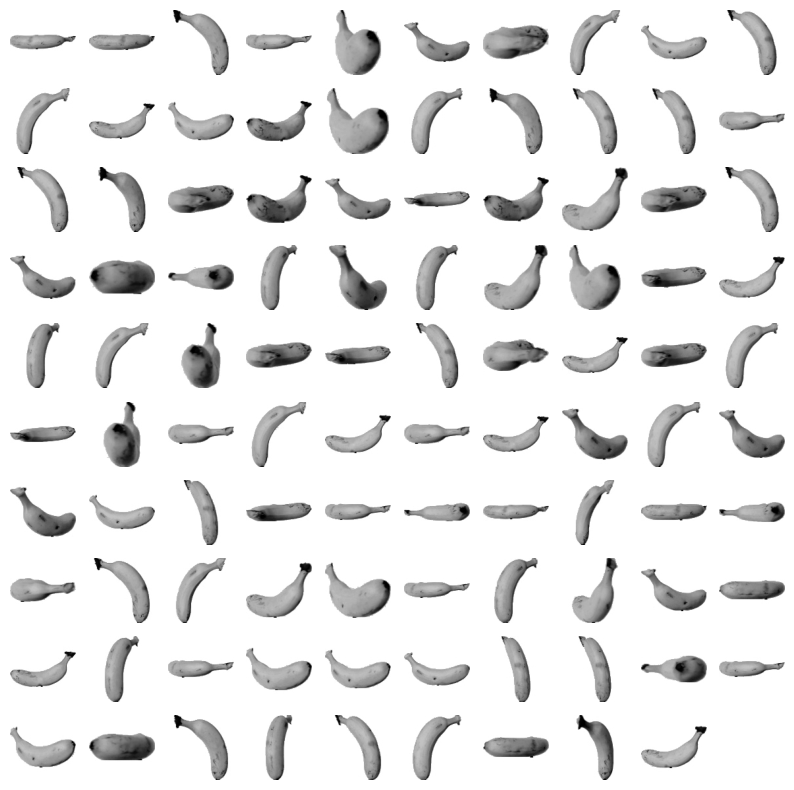

In [66]:
draw_fruits(fruits[km.labels_==0])  #레이블 0인애들만

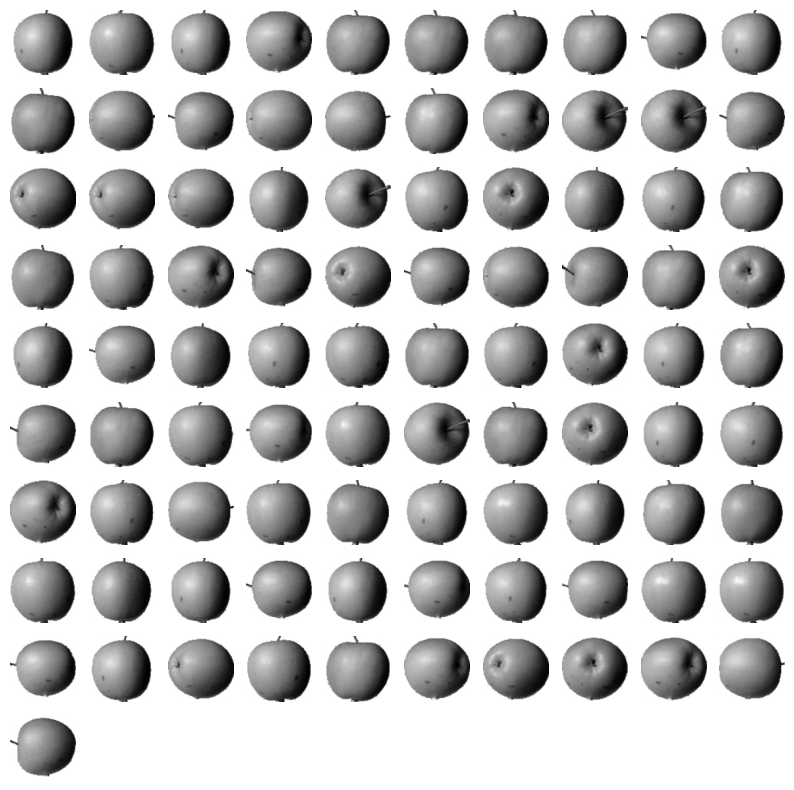

In [67]:
draw_fruits(fruits[km.labels_==1]) 

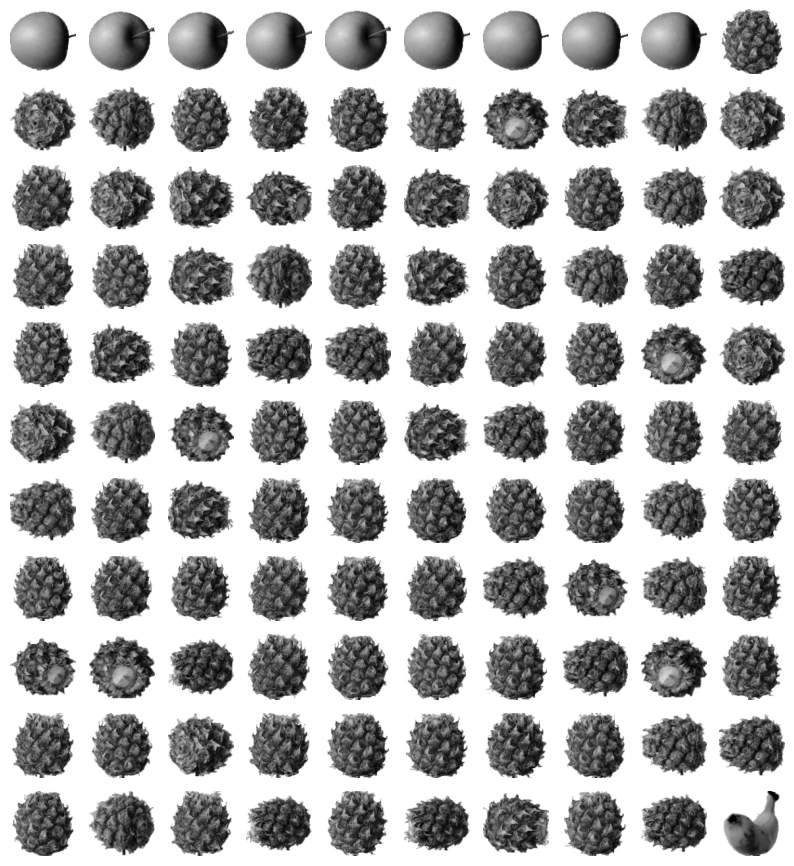

In [68]:
draw_fruits(fruits[km.labels_==2]) 

### 비슷한 과일들끼리 묶인것을 볼 수 있음

# 2-2.km메서드들

## 클러스터 중심: km.cluster_centers_
- 각 클러스터들의 중심값

(3, 10000)


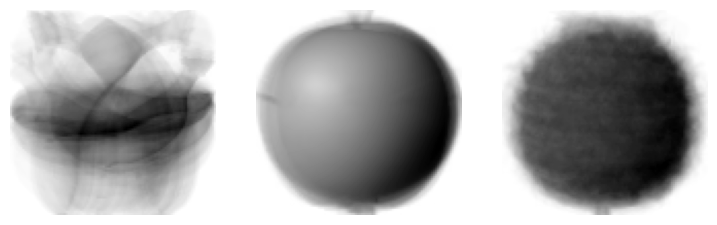

In [72]:
print(km.cluster_centers_.shape)  # 300*10000이었던게 3*10000으로->300개를 3클러스터로 나누고 각 클러스터의 평균값
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

## 각 샘플의 클러스터 중심까지의 거리: km.transform

In [73]:
km.transform(fruits_2d[100:101])   #fruits_2d[100]하면 (10000,)의 1차원이라 에러->fruits_2d[100:101]하면 (1,10000)로 2차원

array([[8804.26277348, 5267.70439881, 3380.6970739 ]])

## 예측: km.predict

[2]


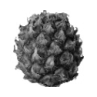

In [75]:
# 위의 결과는 레이블 0,1,2까지의 거리->레이블 2일 확률이 높다
print(km.predict(fruits_2d[100:101]))   #레이블 2
draw_fruits(fruits[100:101])

## 알고리즘 반복횟수: km.n_iter_
- 최적의 클러스터를 찾기까지 반복한 횟수

In [76]:
km.n_iter_

8

# 2-3. 최적의 k찾기: 엘보우 방법
- k찾기는 사전에 클러스터 개수를 지정해야함
- 여기서는 우리가 답을 알기에 3개로 했지만 실전에서는 몇개의 클러스터가 있는지 알 수 없음
- 여러 방법이 있으며 그 중 엘보우 방법
- 이너셔(inertia): 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱값들의 합->이너셔는 클러스터의 샘플이 얼마나 가깝게 있는지를 나타내는 값
- 클러스터 개수가 늘어나면 클러스터 안의 개수는 줄어들기에 이너셔도 줄어듬
- 클러스터 개수를 늘려가며 이너셔를 그려서 감소하는 속도가 꺽이는 지점이 있는데(팔꿈치 모양) 이 지점이 최적의 클러스터 개수 지점 

In [78]:
km.inertia_    #km메서드가 이너시아값 제공

5076006066.308978

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

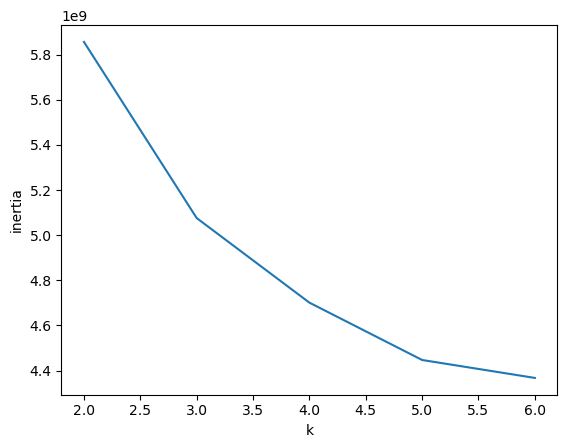

In [84]:
inertia=[]
for k in range(2,7):
    km=KMeans(n_clusters=k, n_init='auto', random_state=123)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## 3에서 확 꺽이는 것을 볼 수 있음
## 주의할 점: 클러스터 개수를 늘리면 늘릴수록 inertia값은 계속 줄어들 수 밖에 없음
## ->너무 많이 늘리지 말고 적당한 지점을 찾기

# 3. 주성분 분석(PCA)
- 사진이 너무 많아 용량이 클 경우 사진 압축하기(차원 축소)
- 과일 사진의 경우 10000개의 픽셀(특성)이 있었기에 10000개의 벡터(차원)
- 이를 PCA로 축소할 수 있으며 이후에는 손실을 줄이면서 복원도 가능

## 주성분 분석=분산(데이터가 퍼진 정도)이 큰 방향을 찾는것
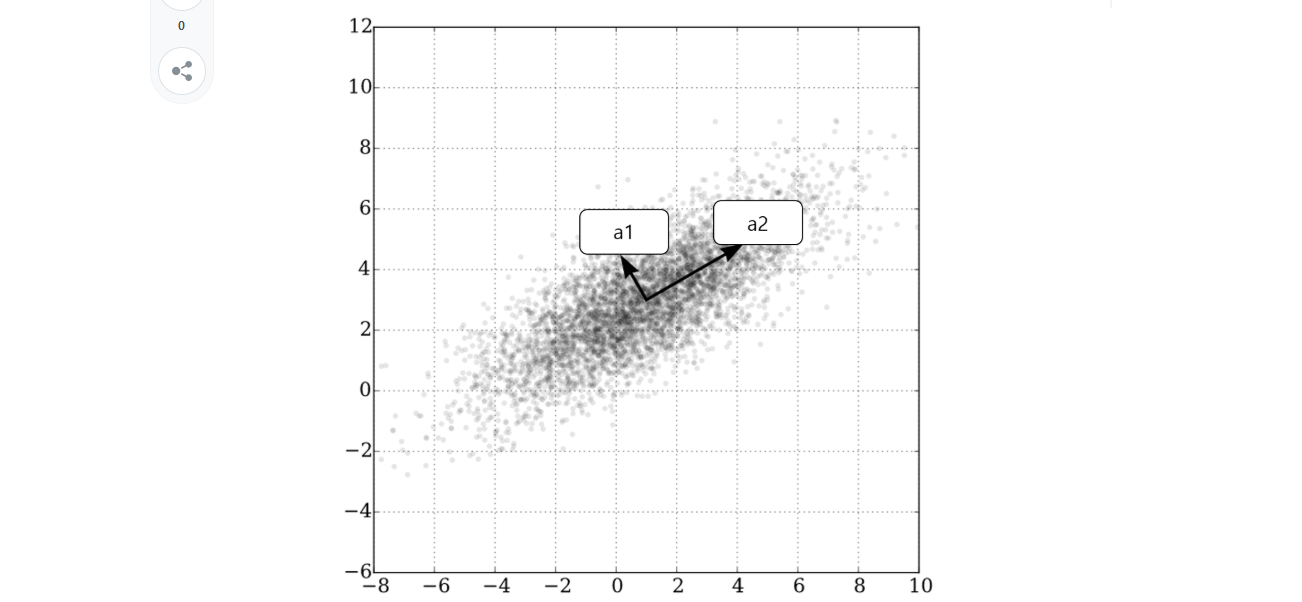  
- 위의 그림에서 분산이 큰 방향은 a1과 a2중 a2
- 또한 a2는 벡터로도 나타낼 수 있음-> 원점을 기준으로 한다면 (3,2)정도 될것임
- 이 벡터를 주성분이라 부름!!!!!
- 주성분 벡터의 원소개수는 원본 데이터셋의 특성개수와 같음
- 제일 큰 분산방향 a2가 첫번째 주성분->이 벡터에 수직이며 그 다음 분산큰 방향 a1이 두번째 주성분->이런식으로 반복하여 특성개수만큼의 주성분을 찾을 수 있음

# 3-1. sklearn.decomposition.PCA사용
- n_components요소로 주성분 개수를 지정
- 비지도 학습으로 k평균과 마찬가지로 정답을 안줘도 됨

In [85]:
fruits_2d.shape

(300, 10000)

In [90]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)   #10000개를 50으로 줄임
pca.fit(fruits_2d)   #학습

PCA(n_components=50)

## 주성분 값은 components에 저장

In [91]:
pca.components_.shape   #n_components,원본데이터 특성개수로 나타내어짐

(50, 10000)

### 이 주성분을 이미지 나타내기

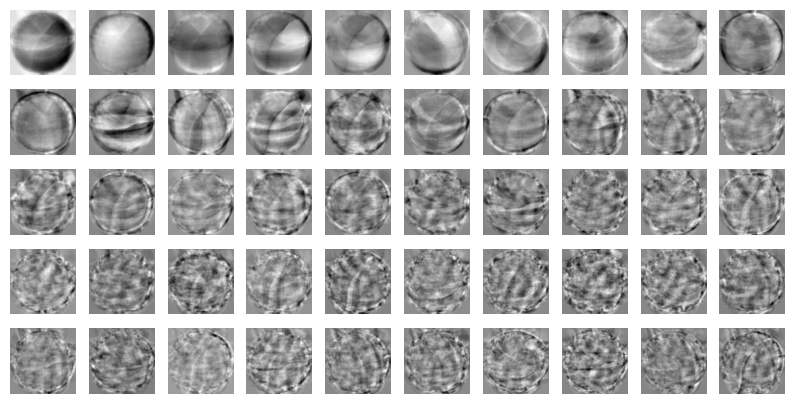

In [92]:
draw_fruits(pca.components_.reshape(-1,100,100))

## 해석: 원본데이터에서 가장 분산이 큰 방향을 순서대로 50개 나타낸것
# ->데이터셋에 있는 어떤 특징을 잡아낸것 !!!!

## 학습 시켰으면 그 모델을 직접 적용시켜 차원축소하기

In [93]:
fruits_pca=pca.transform(fruits_2d)
fruits_pca.shape   #10000->50차원으로 줄어든것을 볼 수 있음

(300, 50)

---
---
---
### 따로 그려보고 싶어서 내가 해본거
- 주성분 100으로 해서 10*10으로 하고 그려본것

In [95]:
pca2=PCA(n_components=100)   #10000개를 50으로 줄임
pca2.fit(fruits_2d)
fruits_pca2=pca2.transform(fruits_2d)
fruits_pca2.shape 

(300, 100)

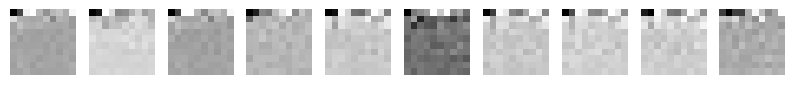

In [97]:
draw_fruits(fruits_pca2[0:10].reshape(-1,10,10))

---
---
---
# 3-2. 원본데이터로 재구성하기
- pca.inverse_transform사용

In [98]:
fruits_inverse=pca.inverse_transform(fruits_pca)
fruits_inverse.shape   #50에서 100000됨

(300, 10000)

## 다시 이미지로 나타내보기

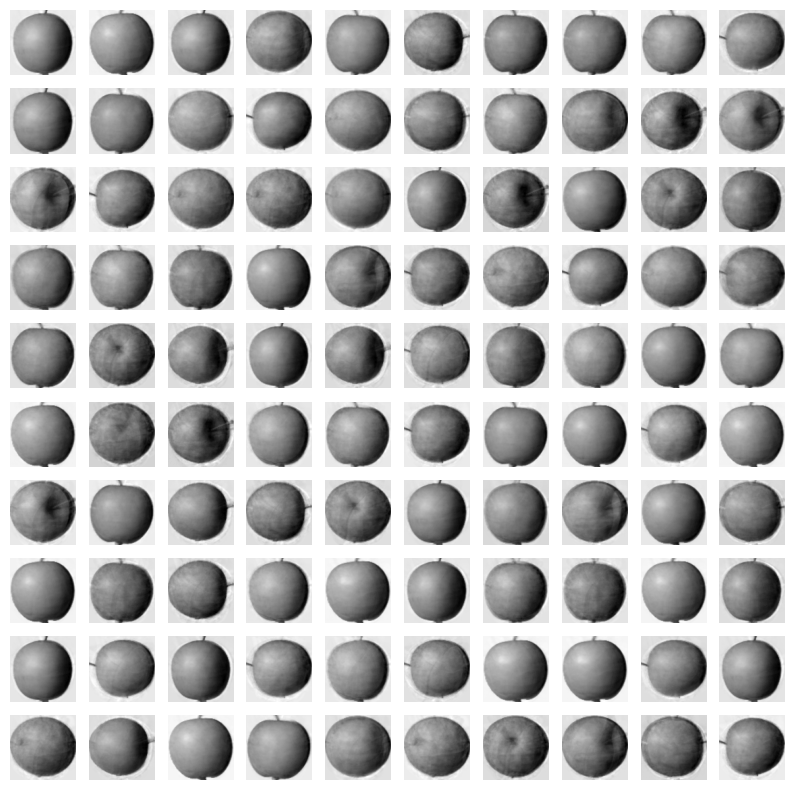

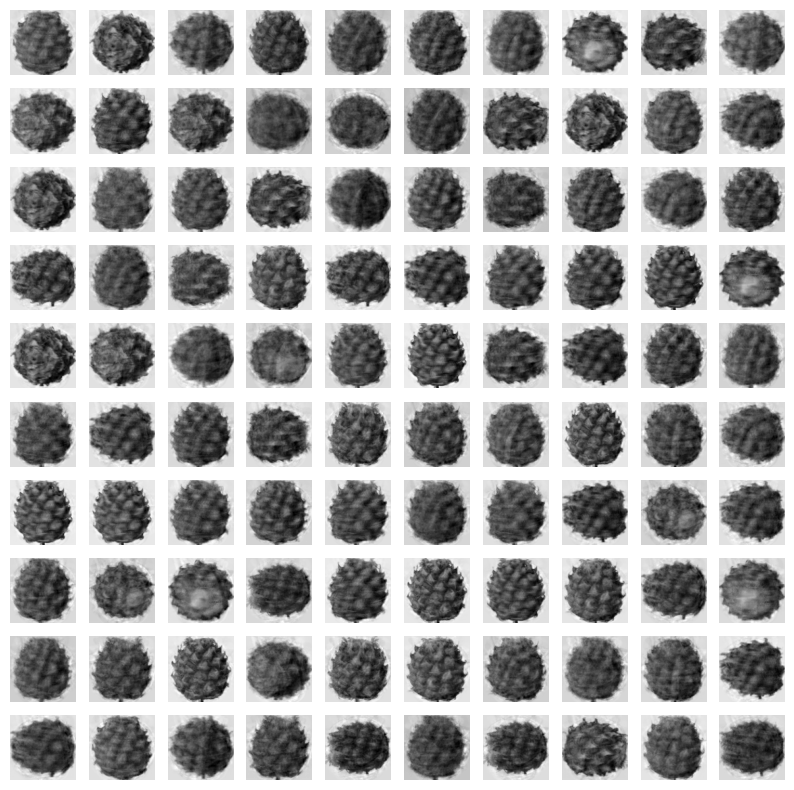

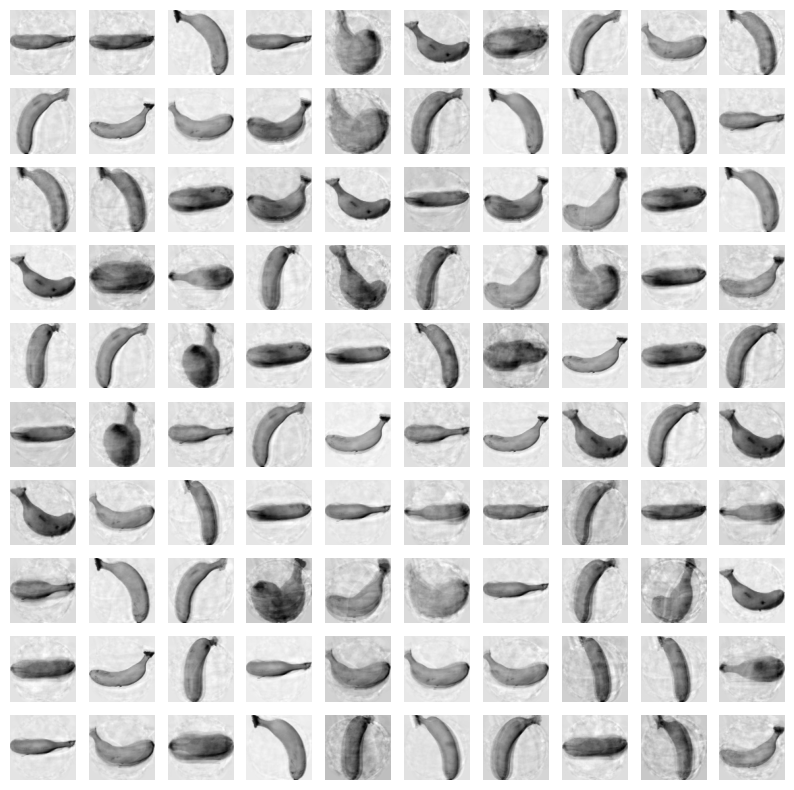

In [99]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)  #그리기 위해서 100*100으로
for i in [0,100,200]:
    draw_fruits(fruits_reconstruct[i:i+100])
    print('\n')

## 그래도 어느정도 보존 잘 된것을 볼 수 있음

# 3-3. 설명된 분산
- 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [101]:
pca.explained_variance_ratio_  #50개의 주성분이 얼마나 분산을 잘 나타내는지에 대한 비율이 나와있음

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486382, 0.00480347,
       0.00447837, 0.00437317, 0.0040804 , 0.00389474, 0.00372432,
       0.00359286, 0.00331457, 0.00317805, 0.00304236, 0.00303762,
       0.00288832, 0.00275809, 0.00264674, 0.00255793, 0.00252149,
       0.00247354, 0.00239576, 0.00230948, 0.00221989, 0.00216837,
       0.00213802, 0.00195792, 0.00193139, 0.0019074 , 0.00182882,
       0.00182526, 0.00173147, 0.00169211, 0.00163733, 0.00161453])

In [102]:
np.sum(pca.explained_variance_ratio_)  #이 총합계가 총 분산비율

0.9215805661765022

<function matplotlib.pyplot.show(close=None, block=None)>

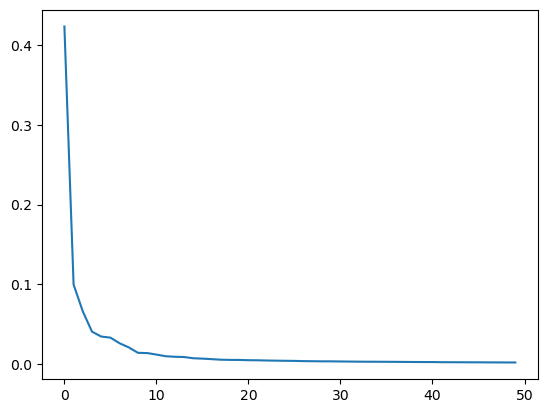

In [103]:
plt.plot(pca.explained_variance_ratio_)
plt.show

###  초반의 10개의 주성분이 대부분의 분산을 표현하고 있음
- 넘파이에서 라쿤그림 100개까지만 가지고 와서 표현한거하고 비슷한 개념

# 3-4. 다른 알고리즘과 함께 사용

## 1. 차원 축소된 데이터로 로지스틱 회귀모델로 3개 과일 분류

In [105]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [107]:
# 정답 필요해서 정답 셋 만들기
answer=np.array([0]*100+[1]*100+[2]*100)   #0은 사과, 1인 파인애플, 2는 바나나
answer.shape

(300,)

In [108]:
# 성능을 알아보기 위해 교차검증 수행
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,answer)    #2차원으로 넣어주기, answer는 1차원으로
np.mean(scores['test_score']),np.mean(scores['fit_time'])  #특성이 10000개나 되기 때문에 과대적합 모델을 만들기 쉬움

(0.9966666666666667, 0.26894526481628417)

In [111]:
# 그렇다면 pca한 이미지는?
scores=cross_validate(lr,fruits_pca,answer)    #fruits_pca는 2차원
np.mean(scores['test_score']),np.mean(scores['fit_time'])  #50개의 특성만 사용했는데도 정확도 높고 시간도 10분의 1로 많이 감소

(0.9966666666666667, 0.014401674270629883)

## PCA는 지정된 분산비율에 도달할때까지 주성분을 찾도록 옵션을 넣을수도 있음
- n_components에 숫자대신 비율로
- np.sum(pca.explained_variance_ratio_)값을 지정

In [112]:
pca=PCA(n_components=0.5)   #np.sum(pca.explained_variance_ratio_)값이 0.5가되는 주성분 개수 
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [114]:
pca.n_components_  #2개면 충분히 데이터에 있는 분산의 50%를 표현할 수 있다는 것을 의미

2

## 이 모델로 진행해보기

In [115]:
fruits_pca=pca.transform(fruits_2d)
fruits_pca.shape   #차원이 10000->2개로

(300, 2)

In [116]:
#검증
scores=cross_validate(lr,fruits_pca,answer)    
np.mean(scores['test_score']),np.mean(scores['fit_time'])  #2개의 특성만 사용했는데도 99퍼의 정답률

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.99, 0.02520442008972168)

## 2. 차원축소된 데이터로 k평균으로 클러스터 찾기

In [118]:
km=KMeans(n_clusters=3, random_state=123)
km.fit(fruits_pca)  #주성분 2개짜리
np.unique(km.labels_,return_counts=True)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(array([0, 1, 2]), array([ 99,  91, 110], dtype=int64))

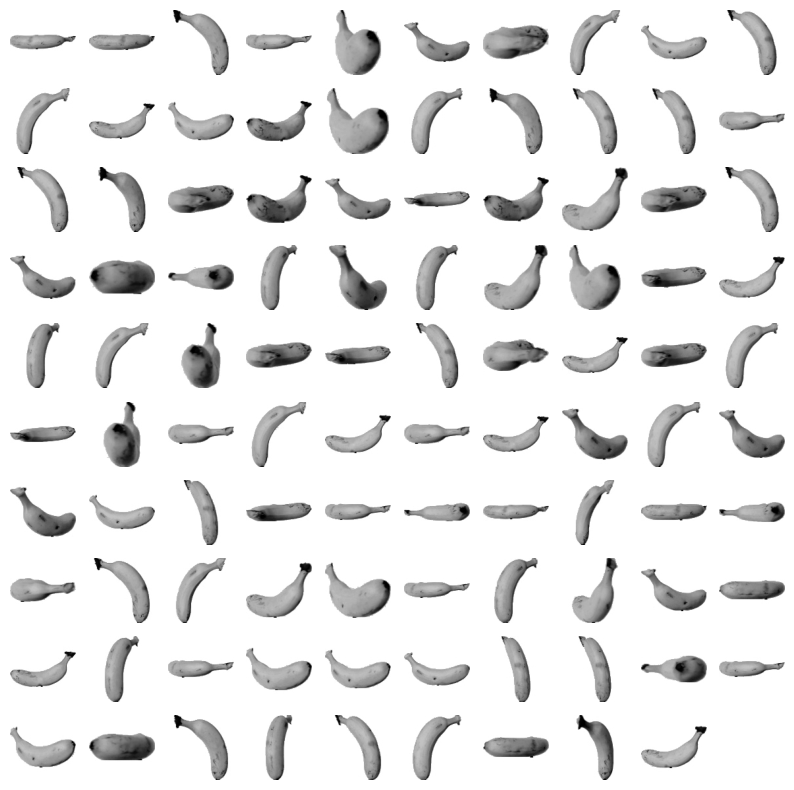

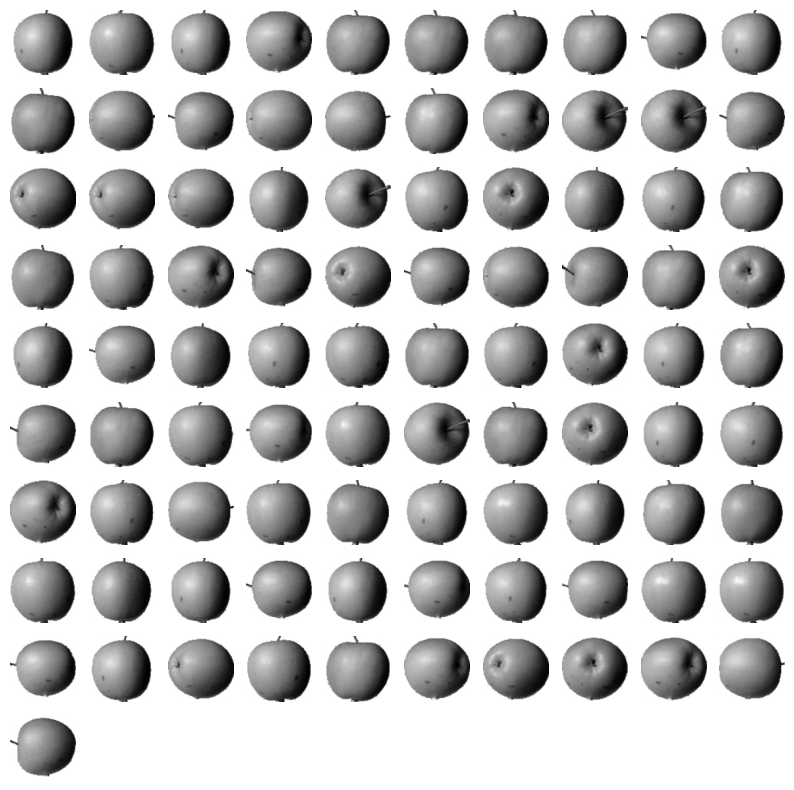

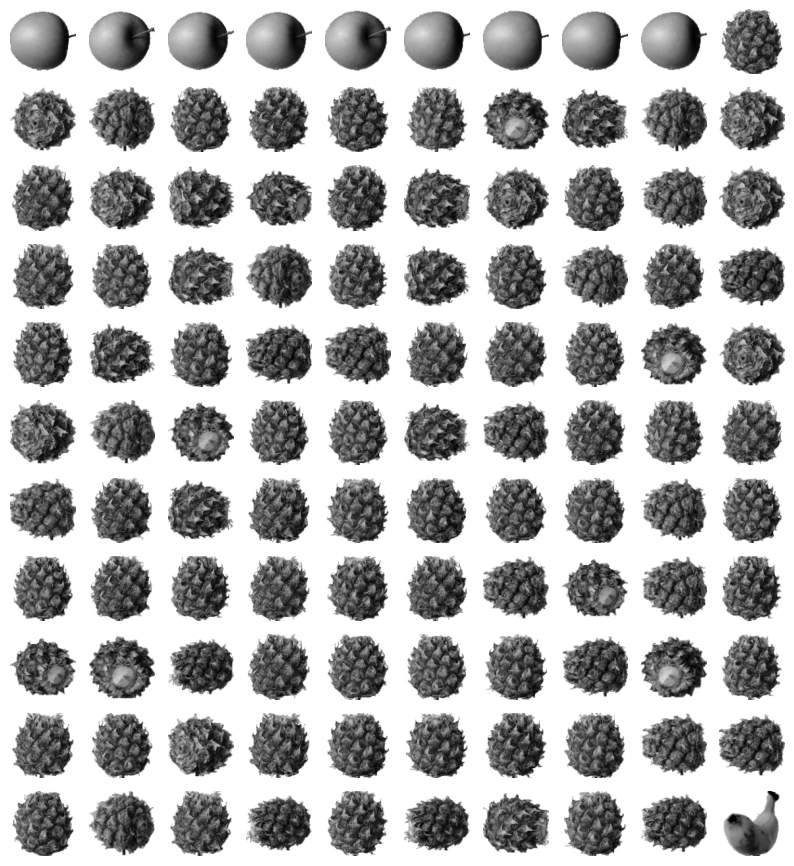

In [119]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print('\n')

## 오차도 있지만 어느정도 맞힘

# 차원 축소의 또다른 장점->3개 이하의 차원으로 줄이면 시각화가 쉬움

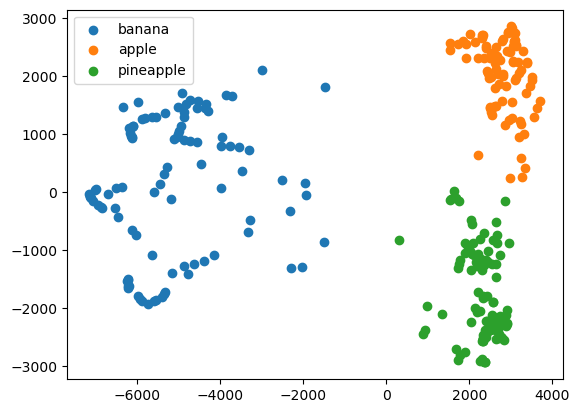

In [121]:
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])   #[:,0]은 첫번째 주성분으로 x축에, [:,1]는 두번째 주성분으로 y축에
plt.legend(['banana','apple','pineapple'])
plt.show()

## 각 클러스터 별 산점도로 구분가능
### apple과 pineapple의 경계가 가깝게 붙어있는 것을 통해 파인애플 예측결과에서 사과가 나온 이유를 알 수 있음 

# 4. 이미지 외의 일반 데이터 프레임에서의 K-means 군집화

In [122]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 예시 데이터
data = pd.DataFrame({
    'income': [15, 16, 17, 35, 45, 55, 75, 85],
    'spending_score': [39, 81, 6, 77, 40, 42, 90, 30]
})

# 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# KMeans 군집화
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_data)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [123]:
data   #cluster 0,1,2가 각 집단

income  spending_score  cluster
0      15              39        2
1      16              81        1
2      17               6        2
3      35              77        1
4      45              40        0
5      55              42        0
6      75              90        1
7      85              30        0

# 좀더 복잡한 데이터

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


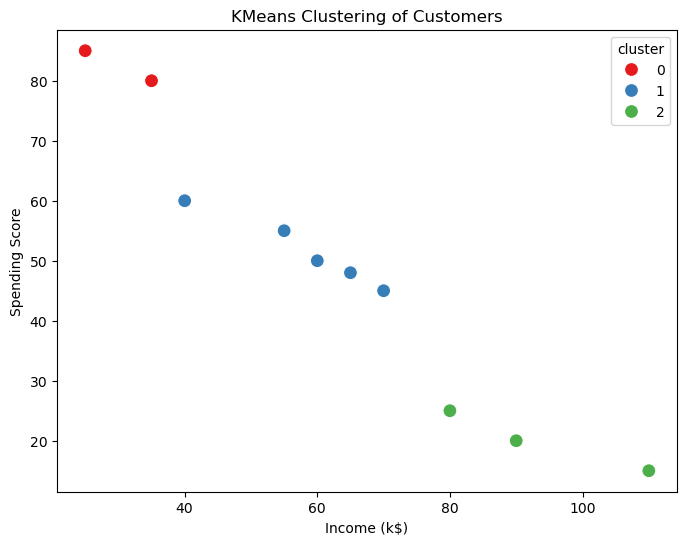

In [124]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터 생성
data = pd.DataFrame({
    'age': [25, 34, 50, 23, 40, 60, 22, 35, 45, 38],
    'income': [40, 70, 90, 35, 60, 110, 25, 55, 80, 65],
    'spending_score': [60, 45, 20, 80, 50, 15, 85, 55, 25, 48],
    'purchase_freq': [10, 20, 5, 25, 15, 3, 30, 18, 8, 16],
    'loyalty_score': [3, 7, 2, 9, 5, 1, 10, 6, 4, 6]
})

# 스케일링 (표준화)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 저장
data['cluster'] = clusters

# 시각화 (연소득 vs 지출 점수)
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='income', y='spending_score', hue='cluster', palette='Set1', s=100)
plt.title("KMeans Clustering of Customers")
plt.xlabel("Income (k$)")
plt.ylabel("Spending Score")
plt.show()

# 여러 메서드
- cluster_centers_: 어떤 특성을 가진 그룹인지 확인

- labels_: 각 데이터가 어디에 속했는지

- inertia_: 군집 품질

- predict(): 새로운 데이터 분류

In [125]:
# 각 군집의 중심좌표
kmeans.cluster_centers_

array([[-1.26536203, -1.3350371 ,  1.5294552 ,  1.51808177,  1.52249881],
       [-0.24102134, -0.20227835,  0.14757901,  0.09715723,  0.03624997],
       [ 1.24527692,  1.22715531, -1.26560182, -1.17398324, -1.07541583]])

In [127]:
#각 샘플이 어떤 레이블에 속하는지
kmeans.labels_

array([1, 1, 2, 0, 1, 2, 0, 1, 2, 1])

In [128]:
kmeans.inertia_ #작을수록 더 뭉쳐있다

7.072362879990529

In [130]:
# 예측하기
kmeans.predict(scaler.transform([[30, 55, 70, 12, 6]]))  # 군집1

C:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

## inverse_transform으로 기준 보기

In [131]:
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)  #cluster_centers_를 복수 
print(pd.DataFrame(original_centers, columns=data.columns[:-1]))  #각 그룹별 중심값이 보여짐

         age     income  spending_score  purchase_freq  loyalty_score
0  22.500000  30.000000            82.5      27.500000       9.500000
1  34.400000  58.000000            51.6      15.800000       5.400000
2  51.666667  93.333333            20.0       5.333333       2.333333
